In [9]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../classifier")
from data import DataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import utils
import numpy as np
from skimage.measure import block_reduce

In [264]:
def resize(img):
    return utils.resize_img(img, target_size=(128, 160))
    
training_data_dir = '../../datasets/moments_video_frames/training'
generator = DataGenerator(seq_length=10,
                          sample_step=3,
                          batch_size=5,
                          seq_overlap=5,
                          min_seq_length=10,
                          #pad_sequences=True,
                          max_seq_per_source=5,
                          rescale= 1./255,
                          target_size=None,
                          shuffle=False,
                          fn_preprocess=resize,
                          output_mode='error',
                          return_sources=True,
                          classes=['cooking'],
                          index_start=0,
                          max_per_class=None)
generator = generator.flow_from_directory(training_data_dir)
iterator = iter(generator)

Found 15036 samples belonging to 1 classes in ../../datasets/moments_video_frames/training
Found 2478 sequences belonging to 1 classes
Sequence distribution:
- 2478 sequences of length 10
Total samples used: 14890
Data shape: (10, 128, 160, 3)


(128, 160, 3)

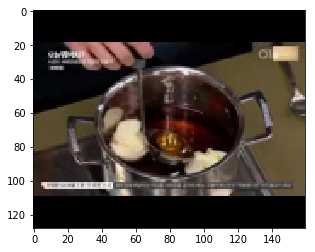

In [248]:
X, y, sources = next(iterator)
plt.imshow(X[0][0])
X[0][0].shape